### Problem Statement
#### Answer the following questions based on the given data set:
1. Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.
<br>
2. What is the frequency distribution of the following features? <br>
    - Influence Score
    - Followers
    - Posts
3. Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.<br>

4. Who are the top 10 influencers in the given dataset based on the following features<br>
    - ● Followers
    - ● Average likes
    - ● Total Likes
5. Describe the relationship between the following pairs of features using a suitable graph<br>
    - ● Followers and Total Likes
    - ● Followers and Influence Score
    - ● Posts and Average likes
    - ● Posts and Influence Score

In [2]:
#Importing necessory Libraries 

import pandas as pd


In [3]:
#Reading File 
df=pd.read_csv("Influencer (1).csv", encoding='latin')

In [4]:
print(df.shape)

(200, 10)


In [5]:
df.head()

,ï»¿Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [6]:
#Checking for null values 
[print(i, df[i].isnull().sum()) for i in df.columns]

ï»¿Rank 0
Channel Info 0
Influence Score 0
Followers 0
Avg. Likes 0
Posts 0
60-Day Eng Rate 0
New Post Avg. Likes 0
Total Likes 0
Country Or Region 63


[None, None, None, None, None, None, None, None, None, None]

In [7]:
#Filling NaN with mode 
x=df["Country Or Region"].mode()
df["Country Or Region"].fillna(x[0], inplace=True)
df.head()

,ï»¿Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,United States
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [8]:
#check for null values and duplicates 
print(df["Country Or Region"].isnull().sum())
print(df.duplicated().value_counts())



0
False    200
dtype: int64


In [9]:
df.columns



Index(['ï»¿Rank', 'Channel Info', 'Influence Score', 'Followers', 'Avg. Likes',
       'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes',
       'Country Or Region'],
      dtype='object')

In [10]:
# Removing units in columns "Followers, Avg. Likes, Posts, 60-Day Eng Rate, New Post Avg. Likes, Total Likes"

def remove_unit(text):
    text=str(text)
    if text[-1].isalpha()==True and len(text[:-1])>0 and text[-1]=="k":
        return float(text[:-1])*1000
    elif text[-1].isalpha()==True and len(text[:-1])>0 and text[-1]=="m":
        return float(text[:-1])*1000000
    elif text[-1].isalpha()==True and len(text[:-1])>0 and text[-1]=="b":
        return float(text[:-1])*1000000000
    else :
        return float(text)
x=remove_unit("10b")    
print(x)

10000000000.0


In [11]:
for i in ['Followers', 'Avg. Likes','Posts',  'New Post Avg. Likes', 'Total Likes']:
    df[i]=df[i].apply(remove_unit)
    
df.head()

,ï»¿Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


In [12]:
df["Channel Info"]=df["Channel Info"].apply(lambda x: x.replace("\n", ""))
df.head()

,ï»¿Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


In [13]:
df.rename(columns = {'ï»¿Rank':'Rank'}, inplace = True)

In [14]:
# Model Builing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()

In [ ]:
Finding Correlation between the features, by taking the 

# Model Builing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
from itertools import combinations
cols = [x for x in df.columns if x != 'Total Likes']
Y = df['Salary']
fit_d = {}
for i in range(1, len(cols)+1):
    for comb in combinations(cols, i):
        X = df[list(comb)]
        # X = sm.add_constant(X)
        model.fit(X,Y)
        fit_d[comb] = model.score(X,Y)

key_max = max(fit_d, key=fit_d.get)

fit_d

In [82]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,United States
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


##### Task 1: Find the correlated between Features

In [15]:
df.corr()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
Rank,1.000000,-0.354843,-0.698193,-0.277699,-0.058132,0.028900,-0.272323,-0.465119
Influence Score,-0.354843,1.000000,0.365428,0.048502,0.168287,-0.072460,0.040011,0.234987
Followers,-0.698193,0.365428,1.000000,0.346829,0.069171,-0.107439,0.260764,0.667546
Avg. Likes,-0.277699,0.048502,0.346829,1.000000,-0.348795,0.789359,0.892784,0.361296
Posts,-0.058132,0.168287,0.069171,-0.348795,1.000000,-0.334047,-0.285154,0.232038
60-Day Eng Rate,0.028900,-0.072460,-0.107439,0.789359,-0.334047,1.000000,0.866293,-0.001560
New Post Avg. Likes,-0.272323,0.040011,0.260764,0.892784,-0.285154,0.866293,1.000000,0.351335
Total Likes,-0.465119,0.234987,0.667546,0.361296,0.232038,-0.001560,0.351335,1.000000


In [57]:
#finding pair of +ve corelated features 
df2=df.corr()
dic2={}
for i in df2.index:
    s=df2[i]
    c=sorted(s)
    val=c[-2]
    cols=s[s==val].index[0]
    if val in dic2:
        val=val-0.000000000000001
        dic2[val]=(i,cols)
    else:
        dic2[val]=(i,cols)
print("+ve corelated features\n")
[print(i," =", dic2[i]) for i in dic2.keys()]

#finding pair of -ve corelated features 
dic3={}
for i in df2.index:
    s=df2[i]
    c=sorted(s)
    val=c[1]
    cols=s[s==val].index[0]
    if val in dic3:
        val=val-0.000000000000001
        dic3[val]=(i,cols)
    else:
        dic3[val]=(i,cols)
print("\n-ve corelated features\n")
[print(i," =", dic3[i]) for i in dic3.keys()]

+ve corelated features

0.02890006865672567  = ('Rank', '60-Day Eng Rate')
0.36542828537500954  = ('Influence Score', 'Followers')
0.6675458848032391  = ('Followers', 'Total Likes')
0.8927840403263658  = ('Avg. Likes', 'New Post Avg. Likes')
0.2320383223863833  = ('Posts', 'Total Likes')
0.8662931596052071  = ('60-Day Eng Rate', 'New Post Avg. Likes')
0.8927840403263648  = ('New Post Avg. Likes', 'Avg. Likes')
0.6675458848032381  = ('Total Likes', 'Followers')

-ve corelated features

-0.4651193641953231  = ('Rank', 'Total Likes')
-0.0724603346118342  = ('Influence Score', '60-Day Eng Rate')
-0.10743886576910691  = ('Followers', '60-Day Eng Rate')
-0.27769904363205694  = ('Avg. Likes', 'Rank')
-0.33404743292555533  = ('Posts', '60-Day Eng Rate')
-0.10743886576910791  = ('60-Day Eng Rate', 'Followers')
-0.27232303356656745  = ('New Post Avg. Likes', 'Rank')
-0.0015603601058510343  = ('Total Likes', '60-Day Eng Rate')


[None, None, None, None, None, None, None, None]

In [59]:
#Getting the best Pair 
import numpy as np

max1=np.array(list(dic2.keys())).max()
print("best +ve pair =",dic2[max1])

min1=np.array(list(dic3.keys())).min()
print("best -ve pair =",dic3[min1])


best +ve pair = ('Avg. Likes', 'New Post Avg. Likes')
best -ve pair = ('Rank', 'Total Likes')


#### Task 2 : Frequency distribution of the following features
    -Influence Score
    -Followers
    -Posts

<AxesSubplot:>

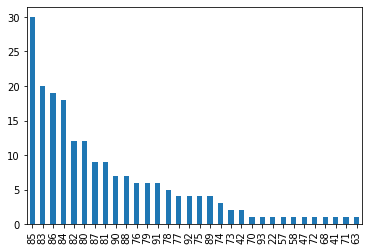

In [64]:
df["Influence Score"].value_counts().plot(kind="bar")


<AxesSubplot:>

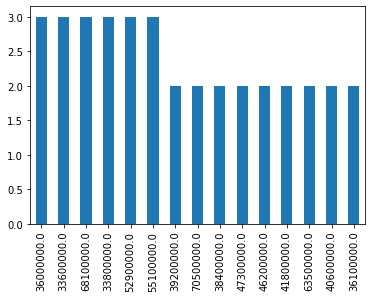

In [76]:
k=df["Followers"].value_counts()
k.iloc[:15].plot(kind="bar")

<AxesSubplot:>

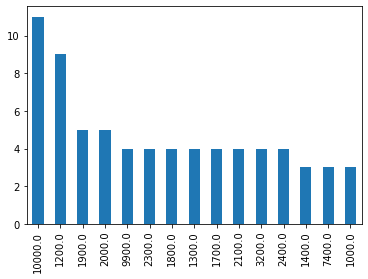

In [78]:
k=df["Posts"].value_counts()
k.iloc[:15].plot(kind="bar")

<AxesSubplot:>

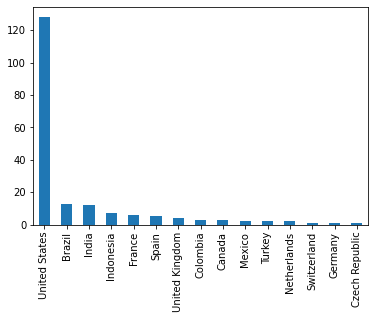

In [79]:
k=df["Country Or Region"].value_counts()
k.iloc[:15].plot(kind="bar")

In [95]:
# Top 10 influencers in the given dataset based on Avg. Likes
print("Top 10 influencers in the given dataset based on Avg. Likes")
[print(i,"=>", df.sort_values("Avg. Likes", ascending=False)["Channel Info"].head(10).iloc[i-1]) for i in range(1,11)]

0          cristiano
1        kyliejenner
2           leomessi
3        selenagomez
4            therock
5       arianagrande
6      kimkardashian
7            beyonce
8    khloekardashian
9       justinbieber
Name: Channel Info, dtype: object

In [122]:
# Top 10 influencers in the given dataset based on Followers
print("Top 10 influencers in the given dataset based on Followers")
[print(i,"=>", df.sort_values("Followers", ascending=False)["Channel Info"].head(10).iloc[i-1]) for i in range(1,11)]

Top 10 influencers in the given dataset based on Followers
1 => cristiano
2 => kyliejenner
3 => leomessi
4 => selenagomez
5 => therock
6 => arianagrande
7 => kimkardashian
8 => beyonce
9 => khloekardashian
10 => justinbieber


[None, None, None, None, None, None, None, None, None, None]

In [123]:
# Top 10 influencers in the given dataset based on Total Likes
print("Top 10 influencers in the given dataset based on Total Likes")
[print(i,"=>", df.sort_values("Total Likes", ascending=False)["Channel Info"].head(10).iloc[i-1]) for i in range(1,11)]

Top 10 influencers in the given dataset based on Total Likes
1 => kyliejenner
2 => cristiano
3 => zendaya
4 => kimkardashian
5 => arianagrande
6 => badgalriri
7 => neymarjr
8 => justinbieber
9 => nickiminaj
10 => therock


[None, None, None, None, None, None, None, None, None, None]

<AxesSubplot:xlabel='Followers', ylabel='Total Likes'>

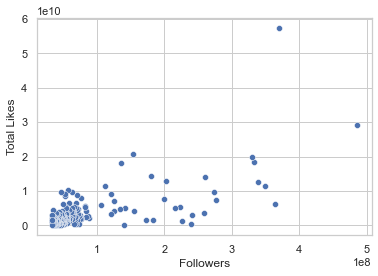

In [126]:
# Relationship between Followers and Total Likes
import seaborn
seaborn.set(style='whitegrid')
data = df[["Followers", "Total Likes"]]
 
seaborn.scatterplot(x="Followers",
                    y="Total Likes",
                    data=data)

<AxesSubplot:xlabel='Influence Score', ylabel='Followers'>

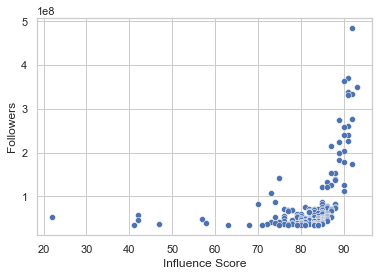

In [127]:
# Relationship between Followers and Influence Score
import seaborn
seaborn.set(style='whitegrid')
data = df[["Followers", "Influence Score"]]
 
seaborn.scatterplot(x="Influence Score",
                    y="Followers",
                    data=data)

<AxesSubplot:xlabel='Posts', ylabel='Avg. Likes'>

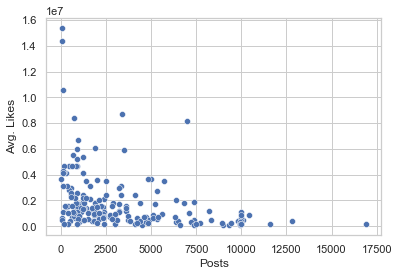

In [128]:
# Relationship between  Posts and Average likes
import seaborn
seaborn.set(style='whitegrid')
data = df[["Posts", "Avg. Likes"]]
 
seaborn.scatterplot(x="Posts",
                    y="Avg. Likes",
                    data=data)

<AxesSubplot:xlabel='Posts', ylabel='Influence Score'>

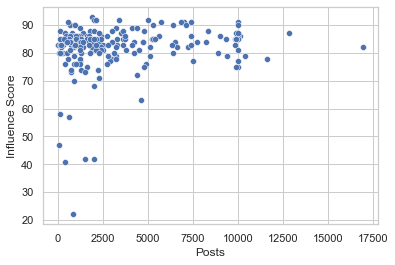

In [129]:
# Relationship between  Posts and Influence Score
import seaborn
seaborn.set(style='whitegrid')
data = df[["Posts", "Influence Score"]]
 
seaborn.scatterplot(x="Posts",
                    y="Influence Score",
                    data=data)